In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
date = pd.read_csv("dim_date.csv")
maker = pd.read_csv("electric_vehicle_sales_by_makers.csv")
state = pd.read_csv("electric_vehicle_sales_by_state.csv")

In [3]:
date.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [4]:
date.shape

(36, 3)

In [5]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes


In [6]:
date['date'] = pd.to_datetime(date['date'])

In [7]:
maker[:4]

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0


In [8]:
maker.shape

(816, 4)

In [9]:
maker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [10]:
maker['date'] = pd.to_datetime(maker['date'])

In [11]:
state[:5]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-04-2021,Sikkim,2-Wheelers,0,398
1,01-04-2021,Sikkim,4-Wheelers,0,361
2,01-05-2021,Sikkim,2-Wheelers,0,113
3,01-05-2021,Sikkim,4-Wheelers,0,98
4,01-06-2021,Sikkim,2-Wheelers,0,229


In [12]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.6+ KB


In [13]:
state['date'] = pd.to_datetime(state['date'])

In [14]:
print(date.info())
print(maker.info())
print(state.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         36 non-null     datetime64[ns]
 1   fiscal_year  36 non-null     int64         
 2   quarter      36 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 992.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    816 non-null    datetime64[ns]
 1   vehicle_category        816 non-null    object        
 2   maker                   816 non-null    object        
 3   electric_vehicles_sold  816 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 25.6+ KB
None
<class 'pandas.core.frame.DataFrame

In [15]:
df_dm = pd.merge(date, maker, on="date")

In [16]:
df_dm.shape

(816, 6)

In [17]:
df_dm[:2]

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0


In [18]:
df = df_dm.merge(state, on="date")

In [19]:
df.shape

(4624, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624 entries, 0 to 4623
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      4624 non-null   datetime64[ns]
 1   fiscal_year               4624 non-null   int64         
 2   quarter                   4624 non-null   object        
 3   vehicle_category_x        4624 non-null   object        
 4   maker                     4624 non-null   object        
 5   electric_vehicles_sold_x  4624 non-null   int64         
 6   state                     4624 non-null   object        
 7   vehicle_category_y        4624 non-null   object        
 8   electric_vehicles_sold_y  4624 non-null   int64         
 9   total_vehicles_sold       4624 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 361.4+ KB


In [21]:
df.head()

,date,fiscal_year,quarter,vehicle_category_x,maker,electric_vehicles_sold_x,state,vehicle_category_y,electric_vehicles_sold_y,total_vehicles_sold
0,2022-01-01,2022,Q4,4-Wheelers,PCA Automobiles,0,Sikkim,2-Wheelers,0,400
1,2022-01-01,2022,Q4,4-Wheelers,PCA Automobiles,0,Sikkim,4-Wheelers,0,270
2,2022-01-01,2022,Q4,4-Wheelers,PCA Automobiles,0,Andaman & Nicobar Island,2-Wheelers,0,336
3,2022-01-01,2022,Q4,4-Wheelers,PCA Automobiles,0,Andaman & Nicobar Island,4-Wheelers,0,90
4,2022-01-01,2022,Q4,4-Wheelers,PCA Automobiles,0,Arunachal Pradesh,2-Wheelers,0,950


In [22]:
state[-4::]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
2441,2024-01-03,DNH and DD,2-Wheelers,25,780
2442,2024-01-03,Manipur,2-Wheelers,13,1394
2443,2024-01-03,Andaman & Nicobar Island,2-Wheelers,2,447
2444,2024-01-03,Nagaland,2-Wheelers,2,1180


In [23]:
maker[-4::]

,date,vehicle_category,maker,electric_vehicles_sold
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2-Wheelers,REVOLT,585
815,2024-03-01,2-Wheelers,OTHERS,10579


# List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in  terms of the number of 2-wheelers sold. 

In [24]:
df_dm[:3]

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0


In [25]:
filter_df = df_dm[(df_dm['vehicle_category'] == "2-Wheelers") & df_dm['fiscal_year'].isin([2023,2024])]
filter_df.sample(5)

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
700,2023-10-01,2024,Q3,2-Wheelers,OTHERS,7092
459,2022-12-01,2023,Q3,2-Wheelers,OKINAWA,5281
534,2023-03-01,2023,Q4,2-Wheelers,OKAYA EV,1765
413,2022-10-01,2023,Q3,2-Wheelers,OKINAWA,14950
762,2024-01-01,2024,Q4,2-Wheelers,OKINAWA,675


In [26]:
filter_data = filter_df.groupby("maker")['electric_vehicles_sold'].sum().reset_index()
filter_data

,maker,electric_vehicles_sold
0,AMPERE,141764
1,ATHER,184473
2,BAJAJ,138492
3,BATTRE ELECTRIC,4841
4,BEING,11018
5,BGAUSS,15051
6,HERO ELECTRIC,100942
7,JITENDRA,8563
8,KINETIC GREEN,9585
9,OKAYA EV,27036


In [27]:
top3 = filter_data.sort_values(by="electric_vehicles_sold", ascending=False).head(3)
top3

,maker,electric_vehicles_sold
11,OLA ELECTRIC,475072
15,TVS,262836
1,ATHER,184473


In [28]:
bottom3 = filter_data.sort_values(by="electric_vehicles_sold", ascending=True).head(3)
bottom3

,maker,electric_vehicles_sold
3,BATTRE ELECTRIC,4841
7,JITENDRA,8563
8,KINETIC GREEN,9585


# Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024. 

In [29]:
state[:3]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-01-04,Sikkim,2-Wheelers,0,398
1,2021-01-04,Sikkim,4-Wheelers,0,361
2,2021-01-05,Sikkim,2-Wheelers,0,113


In [30]:
state['year'] = state['date'].dt.year

### calculate penetration rate

In [31]:
state['penetration'] = (state['electric_vehicles_sold'] / df['total_vehicles_sold'])*100

In [32]:
state[:2]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
0,2021-01-04,Sikkim,2-Wheelers,0,398,2021,0.0
1,2021-01-04,Sikkim,4-Wheelers,0,361,2021,0.0


In [33]:
state_filter = state[state['year'] == 2024]
state_filter.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
66,2024-01-01,Sikkim,2-Wheelers,0,509,2024,0.0
67,2024-01-01,Sikkim,4-Wheelers,0,422,2024,0.0
68,2024-01-02,Sikkim,2-Wheelers,0,408,2024,0.0
69,2024-01-02,Sikkim,4-Wheelers,0,375,2024,0.0
70,2024-01-03,Sikkim,2-Wheelers,0,399,2024,0.0


In [34]:
df_2w = state_filter[state_filter['vehicle_category'] == "2-Wheelers"]
df_4w = state_filter[state_filter['vehicle_category'] == "4-Wheelers"]

In [35]:
top5_2w = df_2w.sort_values(by="penetration", ascending=False).head(5)
top5_2w

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
2393,2024-01-02,Gujarat,2-Wheelers,5103,88441,2024,25515.000000
2386,2024-01-02,Maharashtra,2-Wheelers,15193,147649,2024,16514.130435
2387,2024-01-02,Karnataka,2-Wheelers,12605,108852,2024,2648.109244
2388,2024-01-02,Tamil Nadu,2-Wheelers,8647,143638,2024,2001.620370
2356,2024-01-01,Karnataka,2-Wheelers,12415,115920,2024,1778.653295


In [36]:
top5_4w = df_4w.sort_values(by="penetration", ascending=False).head(5)
top5_4w

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
1363,2024-01-01,Uttar Pradesh,4-Wheelers,399,44334,2024,443.333333
1369,2024-01-01,Rajasthan,4-Wheelers,498,21747,2024,332.000000
1370,2024-01-01,Delhi,4-Wheelers,1345,21520,2024,195.778748
1365,2024-01-01,Karnataka,4-Wheelers,1080,30770,2024,140.992167
1364,2024-01-01,Maharashtra,4-Wheelers,1289,50156,2024,135.684211


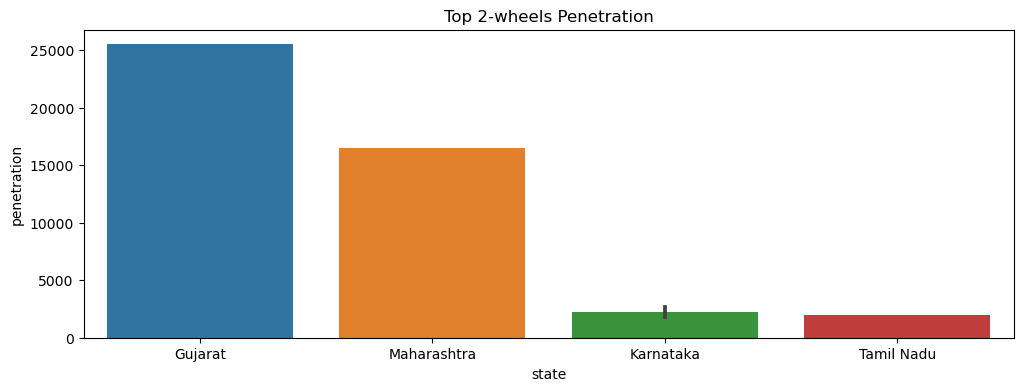

In [37]:
plt.figure(figsize=(12,4))
sns.barplot(data=top5_2w, x="state", y="penetration")
plt.title("Top 2-wheels Penetration")
plt.show()

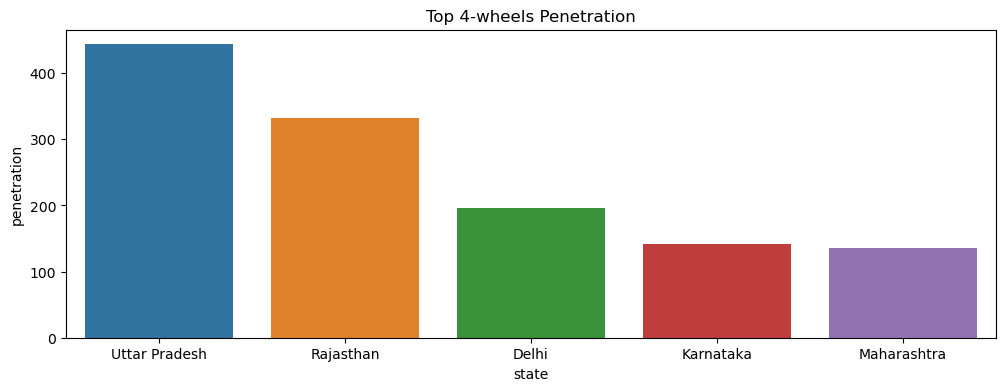

In [38]:
plt.figure(figsize=(12,4))
sns.barplot(data=top5_4w, x="state", y="penetration")
plt.title("Top 4-wheels Penetration")
plt.show()

# List the states with negative penetration (decline) in EV sales from 2022 to 2024? 

In [39]:
state[:2]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
0,2021-01-04,Sikkim,2-Wheelers,0,398,2021,0.0
1,2021-01-04,Sikkim,4-Wheelers,0,361,2021,0.0


In [40]:
state_df = state[state['year'].isin([2022,2023,2024])]
state_df

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
18,2022-01-01,Sikkim,2-Wheelers,0,400,2022,0.000000
19,2022-01-01,Sikkim,4-Wheelers,0,270,2022,0.000000
20,2022-01-02,Sikkim,2-Wheelers,0,384,2022,0.000000
21,2022-01-02,Sikkim,4-Wheelers,0,371,2022,0.000000
22,2022-01-03,Sikkim,2-Wheelers,0,460,2022,0.000000
...,...,...,...,...,...,...,...
2440,2024-01-03,Mizoram,2-Wheelers,58,1932,2024,1.319681
2441,2024-01-03,DNH and DD,2-Wheelers,25,780,2024,0.075490
2442,2024-01-03,Manipur,2-Wheelers,13,1394,2024,0.020646
2443,2024-01-03,Andaman & Nicobar Island,2-Wheelers,2,447,2024,0.001473


In [41]:
data_2022 = state[(state['date'].dt.year == 2022)]
data_2023 = state[(state['date'].dt.year == 2023)]
data_2024 = state[(state['date'].dt.year == 2024)]

In [42]:
ev_sales_2022 = data_2022.groupby('state')['electric_vehicles_sold'].sum().reset_index()
ev_sales_2023 = data_2024.groupby('state')['electric_vehicles_sold'].sum().reset_index()
ev_sales_2024 = data_2024.groupby('state')['electric_vehicles_sold'].sum().reset_index()

In [43]:
ev_sales_2022_2024 = pd.merge(ev_sales_2022, ev_sales_2024, on='state', suffixes=('_2022', '_2024'))

In [44]:
ev_sales_2022_2024

,state,electric_vehicles_sold_2022,electric_vehicles_sold_2024
0,Andaman & Nicobar Island,23,9
1,Andhra Pradesh,28050,12638
2,Arunachal Pradesh,2,10
3,Assam,1984,1364
4,Bihar,10071,5401
5,Chandigarh,1129,763
6,Chhattisgarh,16760,8485
7,DNH and DD,103,92
8,Delhi,40238,13277
9,Goa,5616,3875


In [45]:
# Calculating the change in EV sales from 2022 to 2024
ev_sales_2022_2024['ev_sales_change'] = ev_sales_2024['electric_vehicles_sold'] - ev_sales_2022['electric_vehicles_sold']

In [46]:
ev_sales_2022_2024.head()

,state,electric_vehicles_sold_2022,electric_vehicles_sold_2024,ev_sales_change
0,Andaman & Nicobar Island,23,9,-21.0
1,Andhra Pradesh,28050,12638,-28041.0
2,Arunachal Pradesh,2,10,12636.0
3,Assam,1984,1364,-1974.0
4,Bihar,10071,5401,-8707.0


In [47]:
# Identify states with negative penetration (decline) in EV sales
states_negative_penetration = ev_sales_2022_2024[ev_sales_2022_2024['ev_sales_change'] < 0]

In [48]:
# Display the states with negative penetration and the change in sales
states_negative_penetration[['state', 'ev_sales_change']]

,state,ev_sales_change
0,Andaman & Nicobar Island,-21.0
1,Andhra Pradesh,-28041.0
3,Assam,-1974.0
4,Bihar,-8707.0
6,Chhattisgarh,-15997.0
8,Delhi,-40146.0
10,Gujarat,-63513.0
13,Jammu and Kashmir,-1904.0
14,Jharkhand,-6086.0
15,Karnataka,-89039.0


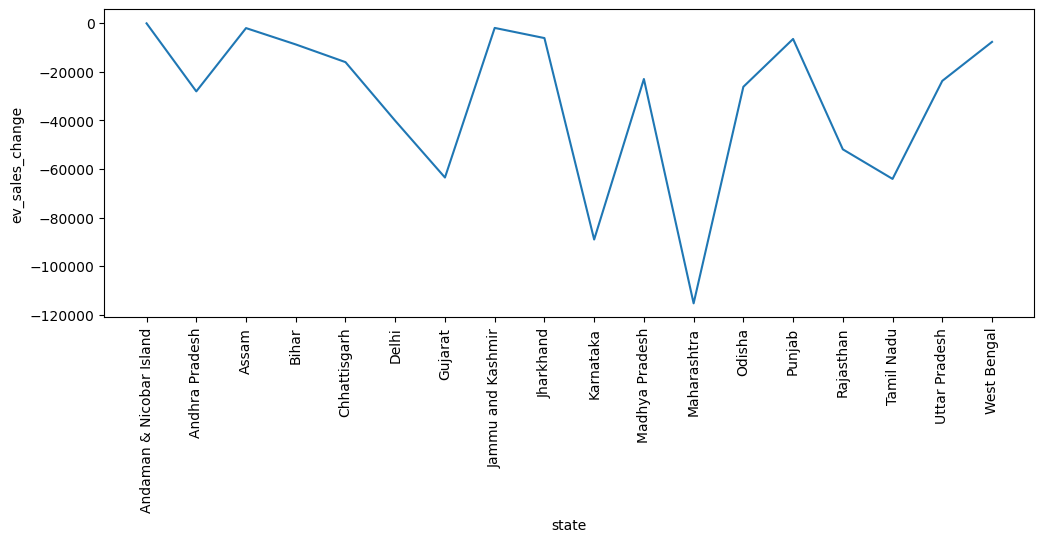

In [49]:
plt.figure(figsize=(12,4))
sns.lineplot(x=states_negative_penetration['state'],y=states_negative_penetration['ev_sales_change'])
plt.xticks(rotation=90)
plt.show()

# What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024? 

In [50]:
df_dm.head()

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0


In [51]:
filter_4w =df_dm[df_dm['vehicle_category'] == "4-Wheelers"]
filter_4w

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0
5,2021-04-01,2022,Q1,4-Wheelers,KIA Motors,0
...,...,...,...,...,...,...
798,2024-03-01,2024,Q4,4-Wheelers,PCA Automobiles,130
799,2024-03-01,2024,Q4,4-Wheelers,BMW India,55
800,2024-03-01,2024,Q4,4-Wheelers,Mercedes -Benz AG,31
801,2024-03-01,2024,Q4,4-Wheelers,Volvo Auto India,39


In [52]:
#find out the total sales for the 4 wheelers
total_sales = filter_4w.groupby("maker")['electric_vehicles_sold'].sum().reset_index()
total_sales

,maker,electric_vehicles_sold
0,BMW India,1370
1,BYD India,2419
2,Hyundai Motor,2076
3,KIA Motors,557
4,MG Motor,13753
5,Mahindra & Mahindra,41193
6,Mercedes -Benz AG,388
7,PCA Automobiles,1684
8,Tata Motors,88935
9,Volvo Auto India,568


In [53]:
#getting the top 5 maker
top5maker = total_sales.sort_values(by="electric_vehicles_sold", ascending=False).head(5)['maker']
top5maker

8            Tata Motors
5    Mahindra & Mahindra
4               MG Motor
1              BYD India
2          Hyundai Motor
Name: maker, dtype: object

In [54]:
top5_data = filter_4w[filter_4w['maker'].isin(top5maker)]
top5_data

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
6,2021-04-01,2022,Q1,4-Wheelers,Tata Motors,322
7,2021-04-01,2022,Q1,4-Wheelers,MG Motor,118
8,2021-04-01,2022,Q1,4-Wheelers,Mahindra & Mahindra,171
9,2021-04-01,2022,Q1,4-Wheelers,Hyundai Motor,12
...,...,...,...,...,...,...
793,2024-03-01,2024,Q4,4-Wheelers,Tata Motors,6606
794,2024-03-01,2024,Q4,4-Wheelers,MG Motor,885
795,2024-03-01,2024,Q4,4-Wheelers,Mahindra & Mahindra,708
796,2024-03-01,2024,Q4,4-Wheelers,BYD India,142


In [55]:
quaterSales = top5_data.groupby(['fiscal_year','maker','quarter'])['electric_vehicles_sold'].sum().reset_index()
quaterSales

,fiscal_year,maker,quarter,electric_vehicles_sold
0,2022,BYD India,Q1,0
1,2022,BYD India,Q2,0
2,2022,BYD India,Q3,1
3,2022,BYD India,Q4,32
4,2022,Hyundai Motor,Q1,25
5,2022,Hyundai Motor,Q2,34
6,2022,Hyundai Motor,Q3,25
7,2022,Hyundai Motor,Q4,26
8,2022,MG Motor,Q1,285
9,2022,MG Motor,Q2,798


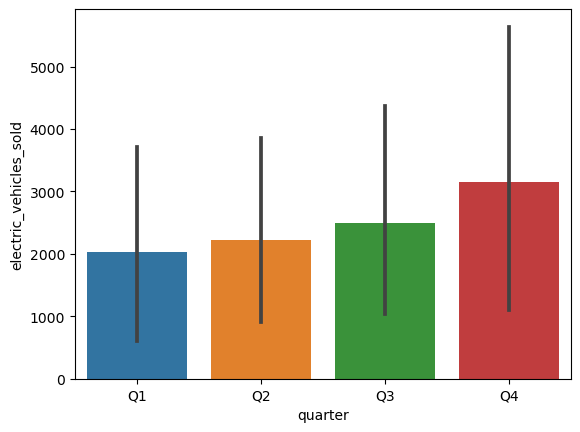

In [56]:
sns.barplot(data=quaterSales, x="quarter", y="electric_vehicles_sold");

# How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024? 

In [57]:
df_sp = state[state['year'] == 2024]
df_sp.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
66,2024-01-01,Sikkim,2-Wheelers,0,509,2024,0.0
67,2024-01-01,Sikkim,4-Wheelers,0,422,2024,0.0
68,2024-01-02,Sikkim,2-Wheelers,0,408,2024,0.0
69,2024-01-02,Sikkim,4-Wheelers,0,375,2024,0.0
70,2024-01-03,Sikkim,2-Wheelers,0,399,2024,0.0


In [58]:
dk = df_sp[df_sp['state'].isin(['Delhi', "Karnataka"])]
dk

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
1365,2024-01-01,Karnataka,4-Wheelers,1080,30770,2024,140.992167
1370,2024-01-01,Delhi,4-Wheelers,1345,21520,2024,195.778748
1393,2024-01-02,Karnataka,4-Wheelers,923,24812,2024,15.707965
1400,2024-01-02,Delhi,4-Wheelers,596,17898,2024,0.998124
1422,2024-01-03,Karnataka,4-Wheelers,1482,26751,2024,2.954958
1425,2024-01-03,Delhi,4-Wheelers,897,15905,2024,0.530977
2356,2024-01-01,Karnataka,2-Wheelers,12415,115920,2024,1778.653295
2361,2024-01-01,Delhi,2-Wheelers,3073,38413,2024,69.509161
2387,2024-01-02,Karnataka,2-Wheelers,12605,108852,2024,2648.109244
2394,2024-01-02,Delhi,2-Wheelers,2364,30504,2024,185.995279


In [59]:
dk[['state','electric_vehicles_sold',"penetration"]]

,state,electric_vehicles_sold,penetration
1365,Karnataka,1080,140.992167
1370,Delhi,1345,195.778748
1393,Karnataka,923,15.707965
1400,Delhi,596,0.998124
1422,Karnataka,1482,2.954958
1425,Delhi,897,0.530977
2356,Karnataka,12415,1778.653295
2361,Delhi,3073,69.509161
2387,Karnataka,12605,2648.109244
2394,Delhi,2364,185.995279


In [60]:
delhi = dk[dk['state'] == "Delhi"]
karnatka = dk[dk['state'] == "Karnataka"]
print(delhi.shape)
print(karnatka.shape)

(6, 7)
(6, 7)


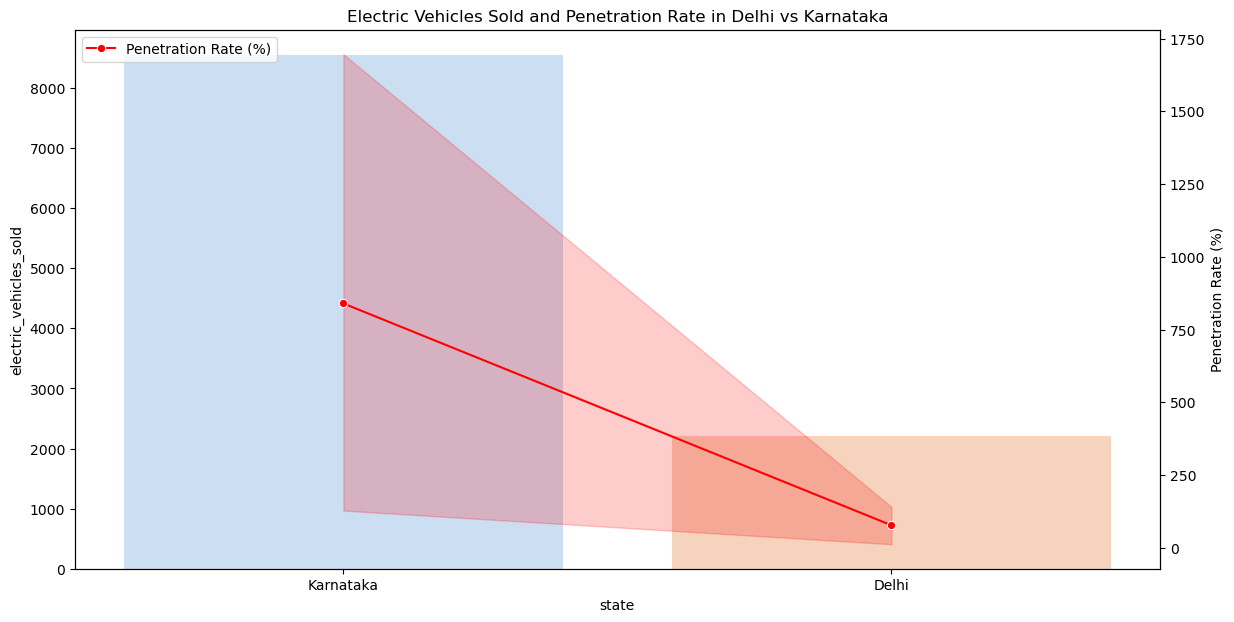

In [61]:
plt.figure(figsize=(14, 7))

# Creating a bar plot for electric vehicles sold
sns.barplot(x='state', y='electric_vehicles_sold', data=dk, ci=None, palette='pastel', label='EVs Sold', alpha=0.6)

# Overlay with penetration rates using secondary y-axis
ax2 = plt.twinx()
sns.lineplot(x='state', y='penetration', data=dk, sort=False, color='r', label='Penetration Rate (%)', marker='o', ax=ax2)

# Labeling the plot
plt.title('Electric Vehicles Sold and Penetration Rate in Delhi vs Karnataka')
plt.xlabel('State')
plt.ylabel('Electric Vehicles Sold')
ax2.set_ylabel('Penetration Rate (%)')


# Adding legends
ax2.legend(loc='upper left')
plt.show()

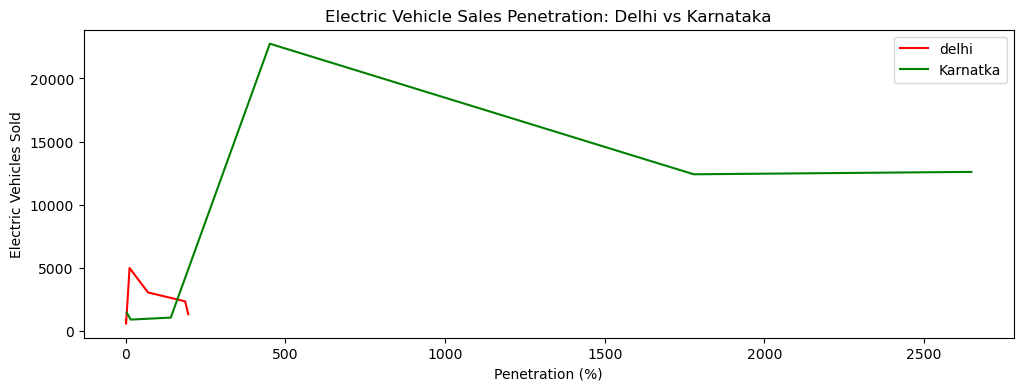

In [62]:
plt.figure(figsize=(12,4))
sns.lineplot(data=delhi, x="penetration", y="electric_vehicles_sold",c='red', label="delhi")
sns.lineplot(data=karnatka, x="penetration", y="electric_vehicles_sold",c='green',label="Karnatka")
plt.xlabel('Penetration (%)')
plt.ylabel('Electric Vehicles Sold')
plt.title('Electric Vehicle Sales Penetration: Delhi vs Karnataka')
plt.legend()
plt.show()

# List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024. 

In [63]:
# df_cagr =state[state['year'].isin([2022,2024]) & state['vehicle_category'].isin(["4-Wheelers"])]
# df_cagr.head(5)

Vf is the final value (sales in 2024).
𝑉
𝑖
V 
i
​
  is the initial value (sales in 2022).
𝑛
n is the number of years (2024 - 2022 = 2).

In [64]:
maker['year'] = maker['date'].dt.year
maker[:3]

,date,vehicle_category,maker,electric_vehicles_sold,year
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2021
1,2022-04-01,2-Wheelers,OKAYA EV,0,2022
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,2021


In [65]:
agg_filter = maker.groupby(['maker','year'])['electric_vehicles_sold'].sum().unstack().fillna(0)
agg_filter

year,2021,2022,2023,2024
maker,,,,
AMPERE,10047.0,82644.0,66393.0,8190.0
ATHER,13631.0,51793.0,103812.0,35213.0
BAJAJ,4275.0,26295.0,74964.0,40072.0
BATTRE ELECTRIC,0.0,0.0,3713.0,1128.0
BEING,4150.0,12888.0,1354.0,0.0
BGAUSS,0.0,0.0,9178.0,5873.0
BMW India,0.0,118.0,984.0,268.0
BYD India,1.0,329.0,1689.0,400.0
HERO ELECTRIC,39789.0,99733.0,29820.0,1052.0


In [66]:
agg_filter['CAGR'] = ((agg_filter[2024]/ agg_filter[2022]) ** (1/2) - 1) * 100

In [67]:
agg_filter

year,2021,2022,2023,2024,CAGR
maker,,,,,
AMPERE,10047.0,82644.0,66393.0,8190.0,-68.519887
ATHER,13631.0,51793.0,103812.0,35213.0,-17.545193
BAJAJ,4275.0,26295.0,74964.0,40072.0,23.447961
BATTRE ELECTRIC,0.0,0.0,3713.0,1128.0,inf
BEING,4150.0,12888.0,1354.0,0.0,-100.000000
BGAUSS,0.0,0.0,9178.0,5873.0,inf
BMW India,0.0,118.0,984.0,268.0,50.704560
BYD India,1.0,329.0,1689.0,400.0,10.263569
HERO ELECTRIC,39789.0,99733.0,29820.0,1052.0,-89.729575


In [68]:
agg_filter= agg_filter.replace([np.inf, -np.inf], np.nan).dropna(subset=['CAGR'])
# agg_filter
top_5cagr = agg_filter.sort_values(by='CAGR', ascending=False)
cagr =top_5cagr.head(5)
cagr =cagr.reset_index()
cagr

year,maker,2021,2022,2023,2024,CAGR
0,Volvo Auto India,0.0,25.0,427.0,116.0,115.406592
1,BMW India,0.0,118.0,984.0,268.0,50.704560
2,Mercedes -Benz AG,16.0,45.0,243.0,84.0,36.626010
3,BAJAJ,4275.0,26295.0,74964.0,40072.0,23.447961
4,BYD India,1.0,329.0,1689.0,400.0,10.263569


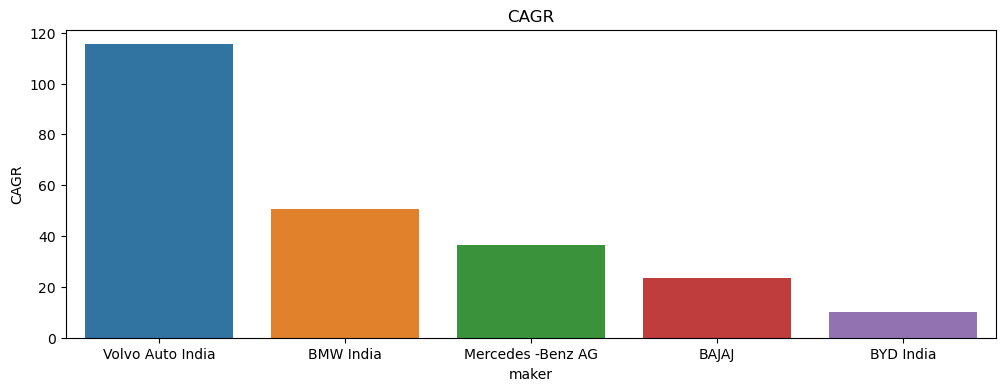

In [69]:
plt.figure(figsize=(12,4))
sns.barplot(data=cagr, x="maker", y="CAGR")
plt.title("CAGR")
plt.show()

# List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold. 

In [70]:
state[:4]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
0,2021-01-04,Sikkim,2-Wheelers,0,398,2021,0.0
1,2021-01-04,Sikkim,4-Wheelers,0,361,2021,0.0
2,2021-01-05,Sikkim,2-Wheelers,0,113,2021,0.0
3,2021-01-05,Sikkim,4-Wheelers,0,98,2021,0.0


In [71]:
state_cagr = state.groupby(['state','year'])['total_vehicles_sold'].sum().unstack().fillna(0)
state_cagr

year,2021,2022,2023,2024
state,,,,
Andaman & Nicobar,0.0,0.0,0.0,660.0
Andaman & Nicobar Island,3731.0,6396.0,6839.0,1259.0
Andhra Pradesh,587368.0,732826.0,761893.0,201784.0
Arunachal Pradesh,14894.0,23242.0,26601.0,6810.0
Assam,279258.0,433527.0,542875.0,147611.0
Bihar,678680.0,983697.0,1107535.0,278461.0
Chandigarh,26857.0,47879.0,47262.0,8630.0
Chhattisgarh,285742.0,432818.0,473973.0,142456.0
DNH and DD,9014.0,14350.0,15935.0,4098.0


In [72]:
state_cagr['cagr'] = ((state_cagr[2024]/ state_cagr[2022]) ** (1/2) - 1) * 100
state_cagr

year,2021,2022,2023,2024,cagr
state,,,,,
Andaman & Nicobar,0.0,0.0,0.0,660.0,inf
Andaman & Nicobar Island,3731.0,6396.0,6839.0,1259.0,-55.633146
Andhra Pradesh,587368.0,732826.0,761893.0,201784.0,-47.526150
Arunachal Pradesh,14894.0,23242.0,26601.0,6810.0,-45.870152
Assam,279258.0,433527.0,542875.0,147611.0,-41.648599
Bihar,678680.0,983697.0,1107535.0,278461.0,-46.795114
Chandigarh,26857.0,47879.0,47262.0,8630.0,-57.544607
Chhattisgarh,285742.0,432818.0,473973.0,142456.0,-42.629621
DNH and DD,9014.0,14350.0,15935.0,4098.0,-46.560790


In [73]:
state_cagr =state_cagr.replace([np.inf, -np.inf], np.nan).dropna(subset=['cagr'])
state_cagr.sort_values(by="cagr", ascending=False)
state_cagr.head(10)

year,2021,2022,2023,2024,cagr
state,,,,,
Andaman & Nicobar Island,3731.0,6396.0,6839.0,1259.0,-55.633146
Andhra Pradesh,587368.0,732826.0,761893.0,201784.0,-47.526150
Arunachal Pradesh,14894.0,23242.0,26601.0,6810.0,-45.870152
Assam,279258.0,433527.0,542875.0,147611.0,-41.648599
Bihar,678680.0,983697.0,1107535.0,278461.0,-46.795114
Chandigarh,26857.0,47879.0,47262.0,8630.0,-57.544607
Chhattisgarh,285742.0,432818.0,473973.0,142456.0,-42.629621
DNH and DD,9014.0,14350.0,15935.0,4098.0,-46.560790
Delhi,282989.0,551880.0,597728.0,155839.0,-46.860710


# What are the peak and low season months for EV sales based on the data from 2022 to 2024?

In [74]:
maker.head()

,date,vehicle_category,maker,electric_vehicles_sold,year
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2021
1,2022-04-01,2-Wheelers,OKAYA EV,0,2022
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,2021
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,2021
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,2021


In [75]:
df_maker = maker[maker['year'].isin([2022,2023,2024])]
df_maker[:3]

,date,vehicle_category,maker,electric_vehicles_sold,year
1,2022-04-01,2-Wheelers,OKAYA EV,0,2022
14,2022-04-01,4-Wheelers,PCA Automobiles,0,2022
15,2022-04-01,4-Wheelers,Volvo Auto India,0,2022


In [77]:
df_maker['month'] = df_maker['date'].dt.month

In [78]:
peak_months = df_maker.groupby("month")['electric_vehicles_sold'].sum()
peak_months = peak_months.sort_values(ascending=False).reset_index()[:10]
peak_months

,month,electric_vehicles_sold
0,3,291587
1,2,198049
2,1,189099
3,11,179037
4,10,162995
5,5,158370
6,12,151160
7,4,128342
8,9,126621
9,8,124808


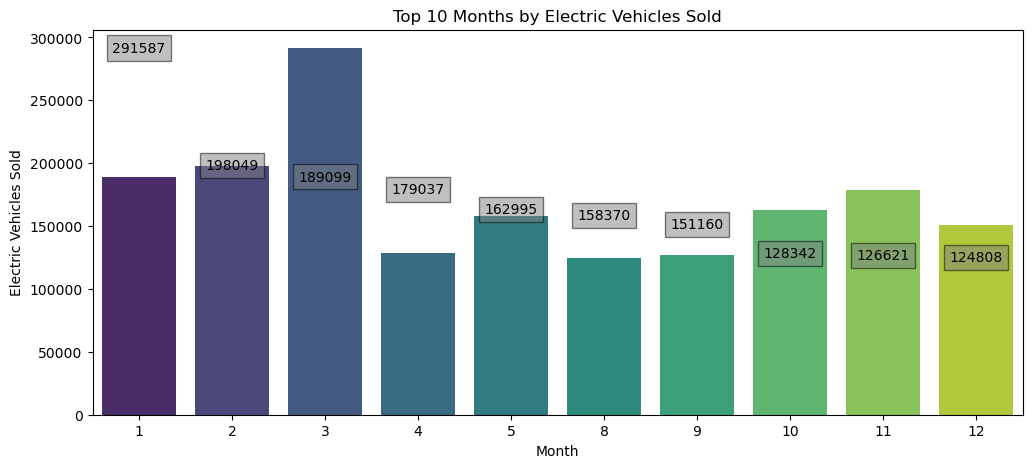

In [79]:
plt.figure(figsize=(12, 5))
bar_plot = sns.barplot(data=peak_months, x="month", y='electric_vehicles_sold', palette='viridis')

# Adding labels to the bars with adjustments
for index, row in peak_months.iterrows():
    bar_plot.text(index, row['electric_vehicles_sold'],round(row['electric_vehicles_sold'], 2),
                  color='black', ha="center", va="center", fontsize=10, 
                  bbox=dict(facecolor='Grey', alpha=0.5))

plt.title('Top 10 Months by Electric Vehicles Sold')
plt.xlabel('Month')
plt.ylabel('Electric Vehicles Sold')
plt.show()

# What is the projected number of EV sales (including 2-wheelers and 4-wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years? 

In [80]:
data = state.copy()
data.sample(5)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
1583,2021-01-09,Odisha,2-Wheelers,490,28355,2021,10.040984
1855,2022-01-07,Punjab,2-Wheelers,603,27082,2022,12.356557
1117,2023-01-04,Goa,4-Wheelers,57,1633,2023,0.259480
1106,2023-01-03,Tamil Nadu,4-Wheelers,571,22131,2023,144.923858
1532,2021-01-07,Madhya Pradesh,2-Wheelers,469,99094,2021,1.131784


### Calculate the CAGR for each state

In [81]:
def calculate_cagr(start_value, end_value, periods):
    return (end_value / start_value) ** (1 / periods) - 1

In [82]:
data_filter = data[(data['year'] >=2022) & (data['year'] <=2024)]
data_filter.sample(5)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
2393,2024-01-02,Gujarat,2-Wheelers,5103,88441,2024,25515.000000
336,2022-01-09,Mizoram,4-Wheelers,0,379,2022,0.000000
1716,2022-01-02,Punjab,2-Wheelers,296,24506,2022,4.088398
529,2022-01-12,Punjab,4-Wheelers,1,13085,2022,0.001349
1322,2023-01-11,Maharashtra,4-Wheelers,1315,48131,2023,7.539705


In [83]:
state_sale = data_filter.groupby(["state","year"])['electric_vehicles_sold'].sum().unstack().fillna(0)
state_sale.sample(5)

year,2022,2023,2024
state,,,
Himachal Pradesh,988.0,1039.0,276.0
Manipur,126.0,119.0,39.0
Assam,1984.0,2724.0,1364.0
Punjab,7652.0,9533.0,3700.0
DNH and DD,103.0,142.0,92.0


In [84]:
state_sale['CAGR'] = state_sale.apply(lambda row: calculate_cagr(row[2022], row[2024], 2), axis=1)

In [85]:
state_sale.sample(5)

year,2022,2023,2024,CAGR
state,,,,
Andhra Pradesh,28050.0,30057.0,12638.0,-0.328768
Maharashtra,129249.0,181523.0,61823.0,-0.308390
Punjab,7652.0,9533.0,3700.0,-0.304634
Himachal Pradesh,988.0,1039.0,276.0,-0.471462
Chandigarh,1129.0,3104.0,763.0,-0.177918


### Identify the top 10 states by penetration rate

In [86]:
state_penetration = state.groupby("state")['penetration'].mean().reset_index()
state_penetration.sample(5)

,state,penetration
29,Sikkim,0.000000
20,Maharashtra,703.158697
18,Ladakh,0.207008
24,Nagaland,0.032914
26,Puducherry,5.237536


In [87]:
state_stats = state_sale.merge(state_penetration, on='state')
state_stats.sample(5)

,state,2022,2023,2024,CAGR,penetration
28,Rajasthan,55600.0,63960.0,19018.0,-0.415149,227.486990
14,Jammu and Kashmir,2180.0,1971.0,801.0,-0.393839,17.150903
8,DNH and DD,103.0,142.0,92.0,-0.054905,0.315958
3,Arunachal Pradesh,2.0,21.0,10.0,1.236068,0.018623
31,Tripura,196.0,286.0,78.0,-0.369160,0.584518


In [88]:
top_10_states = state_stats.sort_values(by="penetration", ascending=False).head(10)
top_10_states

,state,2022,2023,2024,CAGR,penetration
20,Maharashtra,129249.0,181523.0,61823.0,-0.308390,703.158697
11,Gujarat,67388.0,85072.0,20688.0,-0.445926,626.140148
2,Andhra Pradesh,28050.0,30057.0,12638.0,-0.328768,542.992911
25,Odisha,26159.0,39688.0,7969.0,-0.448061,316.147287
16,Karnataka,91247.0,145298.0,51247.0,-0.250581,247.539632
28,Rajasthan,55600.0,63960.0,19018.0,-0.415149,227.486990
30,Tamil Nadu,64082.0,84441.0,31547.0,-0.298365,202.132697
19,Madhya Pradesh,22952.0,37686.0,13923.0,-0.221146,178.415179
9,Delhi,40238.0,45699.0,13277.0,-0.425577,112.268869
17,Kerala,37258.0,70516.0,22533.0,-0.222322,96.831188


### Project the sales for 2030

In [89]:
current_year = 2024
target_year = 2030
years_to_project = target_year - current_year

top_10_states['Projected_2030'] = top_10_states.apply(lambda x:
                                                      x[2024] * ((1 + x['CAGR']) ** years_to_project), axis=1)

In [90]:
top_10_states[['state',"Projected_2030"]]

,state,Projected_2030
20,Maharashtra,6765.793332
11,Gujarat,598.585688
2,Andhra Pradesh,1155.885478
25,Odisha,225.295176
16,Karnataka,9078.581639
28,Rajasthan,761.088216
30,Tamil Nadu,3763.778788
19,Madhya Pradesh,3107.918967
9,Delhi,476.969559
17,Kerala,4984.452385


# Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price

In [91]:
price_2_wheeler = 85000
price_4_wheeler = 1500000

In [92]:
state[:4]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration
0,2021-01-04,Sikkim,2-Wheelers,0,398,2021,0.0
1,2021-01-04,Sikkim,4-Wheelers,0,361,2021,0.0
2,2021-01-05,Sikkim,2-Wheelers,0,113,2021,0.0
3,2021-01-05,Sikkim,4-Wheelers,0,98,2021,0.0


In [93]:
state['revenue'] = state.apply(
    lambda x: x['electric_vehicles_sold'] * price_2_wheeler if x['vehicle_category'] == '2-Wheelers' else x['electric_vehicles_sold'] * price_4_wheeler, axis=1)

In [94]:
state.sample(5)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,year,penetration,revenue
1263,2023-01-09,Karnataka,4-Wheelers,942,24184,2023,11.822289,1413000000
2049,2023-01-02,Kerala,2-Wheelers,5558,39985,2023,1019.816514,472430000
1817,2022-01-06,Karnataka,2-Wheelers,6800,91707,2022,153.811355,578000000
1311,2023-01-11,DNH and DD,4-Wheelers,3,590,2023,0.035638,4500000
366,2022-01-12,Manipur,4-Wheelers,0,1478,2022,0.000000,0


In [95]:
annual_revenue = state.groupby(["year","vehicle_category"])['revenue'].sum().reset_index()
annual_revenue

,year,vehicle_category,revenue
0,2021,2-Wheelers,11248135000
1,2021,4-Wheelers,16287000000
2,2022,2-Wheelers,53642650000
3,2022,4-Wheelers,57255000000
4,2023,2-Wheelers,72831060000
5,2023,4-Wheelers,120181500000
6,2024,2-Wheelers,24897435000
7,2024,4-Wheelers,35691000000


In [96]:
pivot_data_revenue = annual_revenue.pivot(index="vehicle_category",columns='year', values= 'revenue')
pivot_data_revenue

year,2021,2022,2023,2024
vehicle_category,,,,
2-Wheelers,11248135000,53642650000,72831060000,24897435000
4-Wheelers,16287000000,57255000000,120181500000,35691000000


In [97]:
pivot_data_revenue['2022-2024 Growth Rate'] = ((pivot_data_revenue[2024] -pivot_data_revenue[2022] )/ pivot_data_revenue[2022]) * 100
pivot_data_revenue['2023-2024 Growth Rate'] = ((pivot_data_revenue[2024] -pivot_data_revenue[2023] )/ pivot_data_revenue[2023]) * 100

In [98]:
pivot_data_revenue

year,2021,2022,2023,2024,2022-2024 Growth Rate,2023-2024 Growth Rate
vehicle_category,,,,,,
2-Wheelers,11248135000,53642650000,72831060000,24897435000,-53.586493,-65.814812
4-Wheelers,16287000000,57255000000,120181500000,35691000000,-37.663086,-70.302418


In [99]:
pivot_data_revenue[['2022-2024 Growth Rate','2023-2024 Growth Rate']]

year,2022-2024 Growth Rate,2023-2024 Growth Rate
vehicle_category,,
2-Wheelers,-53.586493,-65.814812
4-Wheelers,-37.663086,-70.302418


# What are the primary reasons for customers choosing 4-wheeler EVs in 2023 and 2024 (cost savings, environmental concerns, government incentives)? 

### Primary Reasons for Customers Choosing 4-Wheeler EVs in 2023 and 2024

1. **Cost Savings:**
   - **Lower Operating Costs:** Customers have increasingly recognized the cost efficiency of 4-wheeler EVs. Unlike traditional internal combustion engine vehicles, EVs offer significantly lower operating costs due to reduced fuel expenses and lower maintenance requirements. The high cost of petrol and diesel has further incentivized the shift towards EVs.
   - **Total Cost of Ownership (TCO):** The TCO for EVs has been increasingly favorable. While the initial purchase price may still be higher than traditional vehicles, the overall savings in fuel, maintenance, and tax incentives make EVs more economical in the long run. This has been a significant factor driving the adoption of 4-wheeler EVs.

2. **Environmental Concerns:**
   - **Awareness and Responsibility:** With growing awareness about climate change and the environmental impact of fossil fuels, many customers have opted for EVs as a way to reduce their carbon footprint. The reduction in greenhouse gas emissions and the push for cleaner air in urban areas have made EVs a preferred choice for environmentally-conscious consumers.
   - **Corporate and Social Responsibility (CSR):** Businesses and individuals alike have been increasingly motivated by CSR initiatives. Companies have begun incorporating EVs into their fleets as part of their sustainability strategies, while individual consumers view the adoption of EVs as a contribution to broader environmental goals.

3. **Government Incentives:**
   - **Subsidies and Tax Breaks:** Governments have played a pivotal role in promoting EV adoption by offering financial incentives. These include subsidies on the purchase price, tax exemptions, and reduced registration fees for EV owners. Such incentives have made 4-wheeler EVs more financially accessible to a wider range of customers.
   - **Infrastructure Development:** Investments in charging infrastructure, along with incentives like free or discounted charging, have also encouraged consumers to transition to EVs. The development of extensive charging networks has alleviated range anxiety and made EVs a more practical option for everyday use.


# How do government incentives and subsidies impact the adoption rates of 2-wheelers and 4-wheelers? Which states in India provided most subsidies? 

### Impact of Government Incentives and Subsidies on EV Adoption Rates

1. **Encouraging Early Adoption:**
   - **Reduction in Initial Costs:** Government incentives and subsidies significantly reduce the upfront costs of purchasing electric vehicles (EVs), making them more affordable for a broader range of consumers. This has been particularly impactful for 2-wheelers, where price sensitivity is higher. Subsidies on 2-wheelers have led to a surge in their adoption, especially among middle-income groups and in rural areas.
   - **Boosting Market Demand:** By lowering the financial barriers to entry, subsidies create a more competitive market for EVs. As a result, both 2-wheeler and 4-wheeler EVs have seen increased demand, helping manufacturers scale up production and reduce costs further.

2. **Infrastructure Development:**
   - **Supporting Charging Infrastructure:** Government incentives are often paired with investments in EV infrastructure, such as charging stations. States that invest in charging networks provide a more conducive environment for EV adoption, reducing range anxiety and making EVs a more practical choice for consumers.
   - **Tax Exemptions and Rebates:** In addition to direct subsidies, many state governments offer tax exemptions, lower road taxes, and registration fee waivers for EVs. These financial benefits further enhance the appeal of EVs over traditional internal combustion engine vehicles.

3. **Environmental and Policy Goals:**
   - **Alignment with Green Initiatives:** Subsidies and incentives are aligned with broader governmental goals of reducing carbon emissions and improving air quality. By promoting EV adoption, governments aim to achieve these environmental targets more rapidly.
   - **Policy-Driven Demand:** In some states, policies such as banning the sale of petrol and diesel vehicles by a certain year have also driven EV adoption. Consumers are incentivized to switch to EVs in anticipation of future restrictions on fossil fuel vehicles.

### States Providing the Most Subsidies in India

1. **Delhi:**
   - **Comprehensive Incentive Programs:** Delhi has been one of the most proactive states in promoting EV adoption. The Delhi government offers substantial subsidies on both 2-wheelers and 4-wheelers, along with exemptions from road taxes and registration fees. Additionally, the state has focused on expanding its EV charging infrastructure, making it easier for residents to switch to electric vehicles.

2. **Maharashtra:**
   - **Incentives Across Vehicle Segments:** Maharashtra offers attractive subsidies on both 2-wheelers and 4-wheelers, with additional benefits for scrapping old vehicles. The state government has also been working on expanding the EV charging network and providing subsidies for setting up private charging stations.

3. **Gujarat:**
   - **High Subsidies for 2-Wheelers:** Gujarat has a particularly strong focus on subsidizing 2-wheeler EVs, making them more accessible to the public. The state's EV policy also includes incentives for battery manufacturing and infrastructure development, further supporting the ecosystem for EVs.

4. **Tamil Nadu:**
   - **Industrial and Consumer Focus:** Tamil Nadu's incentives are geared towards both consumers and manufacturers. The state offers subsidies on the purchase of EVs, particularly for 2-wheelers, and has also attracted significant investment in EV manufacturing facilities, creating a supportive environment for the industry.

5. **Karnataka:**
   - **Leading in EV Manufacturing:** Karnataka provides subsidies and tax exemptions for EV buyers and is also a hub for EV manufacturing in India. The state’s policy has encouraged both consumer adoption and industrial growth in the EV sector.

# How does the availability of charging stations infrastructure correlate with the EV sales and penetration rates in the top 5 states?

### Correlation Between Charging Station Infrastructure and EV Sales & Penetration Rates in the Top 5 States

1. **Key Role of Charging Infrastructure:**
   - **Enabling Greater Adoption:** The availability of charging stations is one of the most critical factors influencing the adoption of electric vehicles (EVs). In regions where charging infrastructure is well-developed, consumers are more likely to purchase EVs due to the reduced range anxiety and increased convenience. This is particularly true for urban areas where space for home charging may be limited.
   - **Impact on Penetration Rates:** States with a higher density of charging stations typically see higher EV penetration rates. The presence of charging infrastructure reassures consumers that they can reliably use their EVs for both short and long journeys, thereby driving up sales and adoption.

2. **Top 5 States Analysis:**

   **1. Delhi**
   - **Dense Charging Network:** Delhi has a robust network of charging stations, with both public and private players involved in its expansion. The government's push for EV adoption has been matched with investments in charging infrastructure, leading to high EV sales and penetration rates. Delhi's charging infrastructure has been a significant enabler for its high adoption of 2-wheelers and 4-wheelers.

   **2. Maharashtra**
   - **Strategic Infrastructure Expansion:** Maharashtra has seen rapid growth in its EV charging infrastructure, particularly in major cities like Mumbai and Pune. This expansion has directly correlated with an increase in EV sales, particularly for 4-wheelers. The state’s focus on both fast chargers and regular charging stations has made it easier for consumers to transition to EVs.

   **3. Karnataka**
   - **Technology Hub with Ample Infrastructure:** As a technology and innovation hub, Karnataka has invested significantly in EV infrastructure, especially in Bangalore. The availability of charging stations in key areas has facilitated higher EV penetration rates. The correlation between infrastructure and sales is particularly evident in urban areas, where the presence of charging stations has encouraged more consumers to opt for EVs.

   **4. Gujarat**
   - **Aggressive Infrastructure Development:** Gujarat has aggressively expanded its EV charging network, making it one of the most EV-friendly states in India. This investment in infrastructure has led to a notable increase in both 2-wheeler and 4-wheeler EV sales. The state’s strategy of integrating charging stations in residential areas, highways, and commercial zones has boosted consumer confidence, leading to higher penetration rates.

   **5. Tamil Nadu**
   - **Balancing Industrial Growth and Consumer Needs:** Tamil Nadu has focused on building an EV ecosystem that includes manufacturing and consumer infrastructure. The state’s charging infrastructure, particularly in cities like Chennai and Coimbatore, has grown in tandem with EV sales. The correlation is evident as the availability of charging stations has made EVs a more viable option for daily commutes and long-distance travel.

3. **Correlation Analysis:**
   - **Positive Correlation:** In all these states, a clear positive correlation exists between the availability of charging stations and the sales and penetration rates of EVs. The more accessible and reliable the charging infrastructure, the higher the likelihood of consumers adopting EVs. This correlation underscores the importance of continued investment in charging infrastructure to sustain and accelerate the growth of the EV market.

   - **Feedback Loop:** As EV adoption increases, it further incentivizes both the public and private sectors to expand charging infrastructure, creating a positive feedback loop that continues to drive growth in both EV sales and penetration rates.

# Q4. Who should be the brand ambassador if AtliQ Motors launches their EV/Hybrid vehicles in India and why? 

To select a brand ambassador for AtliQ Motors' EV/Hybrid vehicle launch in India, it's essential to consider someone who resonates with the brand’s values and target audience. A well-suited choice would be an environmentally conscious celebrity with a strong public image, such as Bollywood actor **Ranveer Singh**. Known for his dynamic personality, wide appeal among the younger generation, and commitment to sustainability, Ranveer could effectively convey the brand's message of innovation and eco-friendliness.

Ranveer’s active engagement in social causes and his charismatic influence make him an ideal ambassador to not only boost the brand’s visibility but also to align AtliQ Motors with the growing trend of sustainable living. His association would help in appealing to both urban professionals and younger demographics, thereby driving sales and enhancing the brand’s image as a forward-thinking, environmentally responsible company.

# Which state of India is ideal to start the manufacturing unit? (Based on subsidies provided, ease of doing business, stability in governance etc.) 

**Maharashtra** stands out as the ideal state in India to establish an EV manufacturing unit, thanks to its comprehensive support for the industry, ease of doing business, and stable governance. The state offers substantial subsidies under its Electric Vehicle Policy, including capital subsidies, stamp duty exemptions, and incentives for setting up manufacturing units. These benefits make Maharashtra financially attractive for businesses looking to enter the EV sector.

Maharashtra's strategic location, with well-developed infrastructure and proximity to major markets, enhances its appeal. The state's established automotive industry ecosystem provides easy access to a skilled workforce and supply chain networks, further reducing operational costs. Additionally, Maharashtra ranks high in the Ease of Doing Business index, reflecting its business-friendly environment, efficient bureaucracy, and supportive policies.

Political stability and progressive governance in Maharashtra contribute to a conducive environment for long-term investments. The state government’s commitment to fostering the EV industry is evident in its policies aimed at promoting innovation and sustainable development.

In conclusion, Maharashtra offers a robust combination of financial incentives, infrastructure, and governance, making it an ideal location for setting up an EV manufacturing unit.

# Your top 3 recommendations for AtliQ Motors. 

1. **Focus on Affordable EV Models**: AtliQ Motors should prioritize developing cost-effective EV models, especially in the two-wheeler segment. Given the price sensitivity of the Indian market, offering affordable options will attract a broader customer base and drive mass adoption.

2. **Expand Charging Infrastructure Partnerships**: To ensure seamless customer experiences, AtliQ Motors should collaborate with governments and private players to expand the charging infrastructure across key markets. This will alleviate range anxiety and enhance the appeal of their EV offerings.

3. **Leverage Government Incentives and Local Manufacturing**: By capitalizing on state and central government incentives, AtliQ Motors can reduce production costs and offer competitive pricing. Establishing local manufacturing units in states like Maharashtra can also benefit from subsidies, tax breaks, and ease of doing business, further strengthening the brand’s market position.